<a href="https://colab.research.google.com/github/Nicolas-Noir/AA2-TUIA-2025/blob/main/Practica/AA2_lab3_a_18_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3a: MNIST

El objetivo de este laboratorio es entrenar una red neuronal para clasificar dígitos escritos a mano. Para ello, utilizaremos el conjunto de datos MNIST, que contiene 70,000 imágenes de 28x28 píxeles en escala de grises de dígitos escritos a mano.

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [ ]:
import os

REPO_NAME = "lab3"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



Cloning into 'lab3'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 23 (delta 10), reused 19 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 153.07 KiB | 9.00 MiB/s, done.
Resolving deltas: 100% (10/10), done.


Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Establecer GPU por defecto en caso de estar disponible.

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

## Análisis Exploratorio.

Cargar y visualizar los datos.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Ejemplos de entrenamiento: (60000, 28, 28)
Ejemplos de test: (10000, 28, 28)


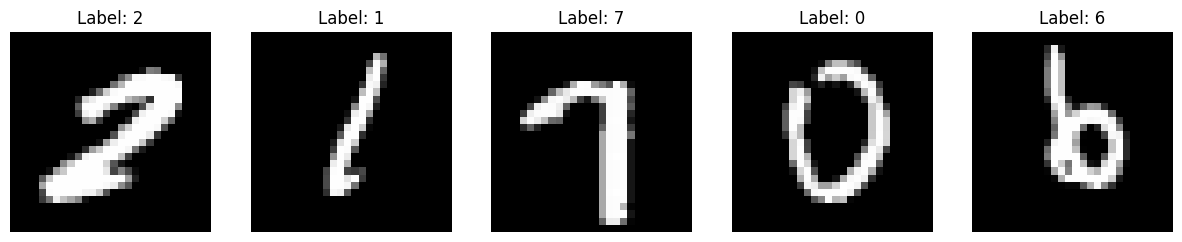

In [ ]:
# Cargamos MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

print("Ejemplos de entrenamiento:", X_train.shape)
print("Ejemplos de test:", X_test.shape)

# Mostramos algunos ejemplos al azar:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    idx = np.random.randint(0, X_train.shape[0])
    axs[i].imshow(X_train[idx], cmap='gray')
    axs[i].set_title(f"Label: {y_train[idx]}")
    axs[i].axis('off')
plt.show()

## Entrenamiento

Definimos nuestro modelo usando tensorflow.

In [ ]:
activacion = ['sigmoid', 'relu']
grafico = []
for activ in activacion:
  print(f'modelo con activacion {activ}')
  model = Sequential(
      [
          # Flatten convierte la imagen 2D en un vector 1D de 28*28=784 componentes.
          # Esto nos permite usar las imágenes directamente como entrada a la red.
          Flatten(input_shape=(28, 28)),
          ##### COMPLETAR DEFINICIÓN DE LA RED #####
          # Agregar una capa oculta de entre 50 y 200 neuronas con función de activación a elección.
          # Probar con distintas funciones de activación y cantidad de neuronas para obtener el mejor resultado.
          # Agregar la capa de salida con la cantidad de neuronas y función de activación adecuadas.
          ##########################################

          tf.keras.layers.Dense(units=160, activation=activ),
          tf.keras.layers.Dense(units=10, activation='softmax')
      ]
  )

  #entrenamiento del modelo

  model.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
  grafico.append(history)

modelo con activacion sigmoid


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8379 - loss: 0.6374 - val_accuracy: 0.9362 - val_loss: 0.2225
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9380 - loss: 0.2100 - val_accuracy: 0.9537 - val_loss: 0.1565
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9580 - loss: 0.1443 - val_accuracy: 0.9640 - val_loss: 0.1230
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9701 - loss: 0.1036 - val_accuracy: 0.9682 - val_loss: 0.1059
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9775 - loss: 0.0789 - val_accuracy: 0.9711 - val_loss: 0.0903
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9818 - loss: 0.0660 - val_accuracy: 0.9733 - val_loss: 0.0864
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9849 - loss: 0.0537 - val_accuracy: 0.9759 - val_loss: 0.0751
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9887 - loss: 0.0435 

Plot del historial de métricas.

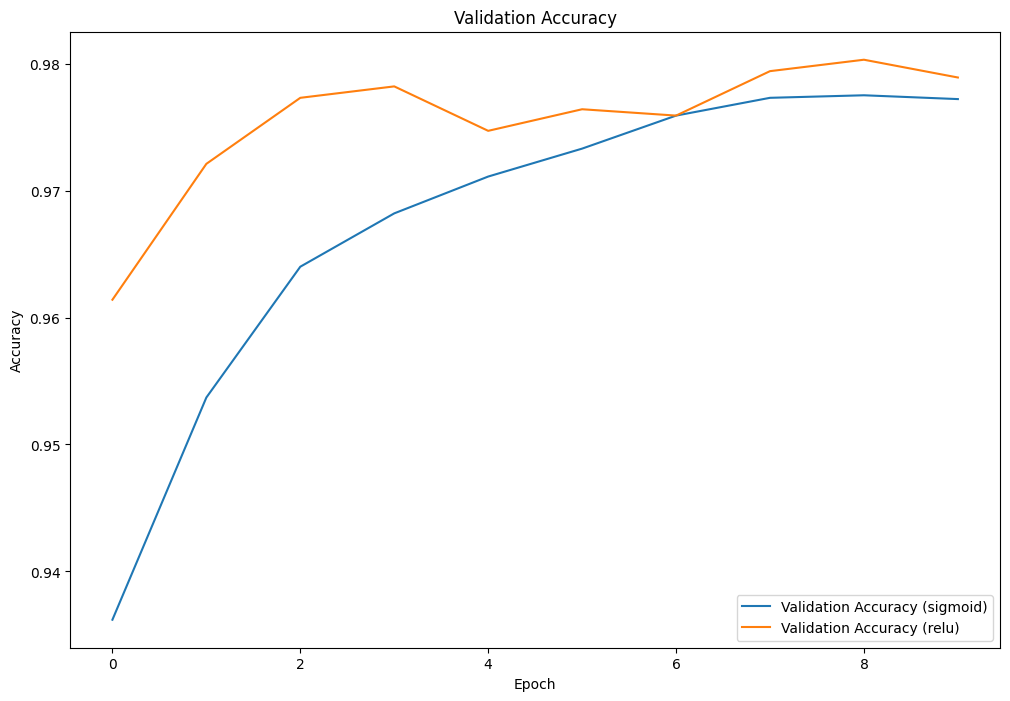

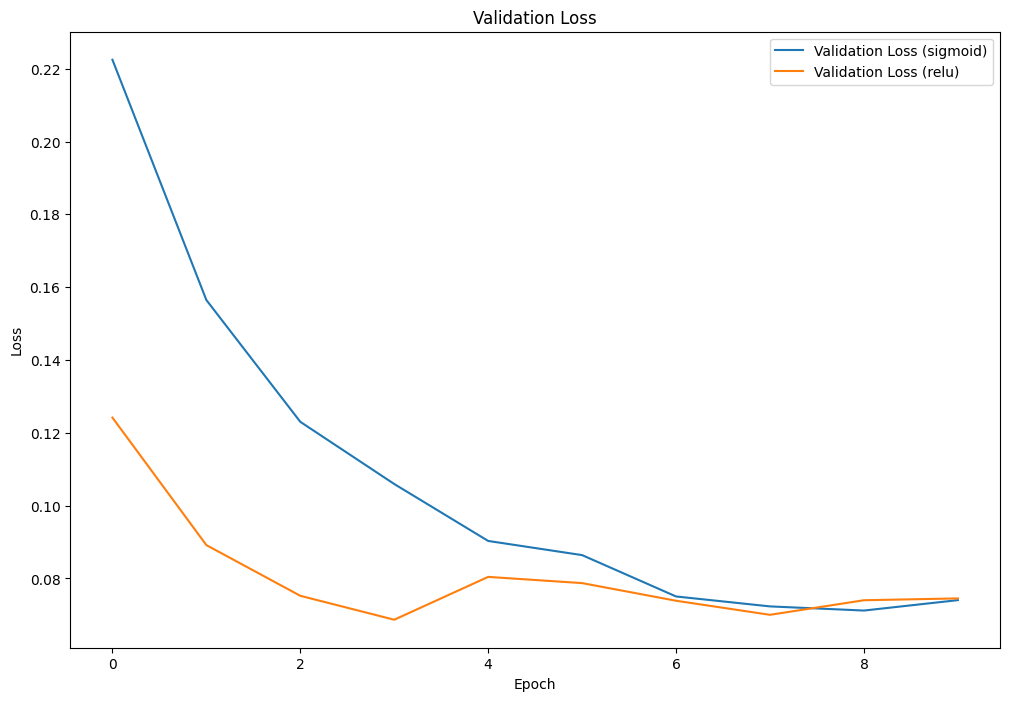

In [ ]:
plt.figure(figsize=(12, 8))

for i, histo in enumerate(grafico):
    optimizer = activacion[i]
    plt.plot(histo.history['val_accuracy'], label=f'Validation Accuracy ({optimizer})')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss
plt.figure(figsize=(12, 8))

for i, histo in enumerate(grafico):
    optimizer = activacion[i]
    plt.plot(histo.history['val_loss'], label=f'Validation Loss ({optimizer})')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


Probamos predicciones sobre el conjunto de test.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


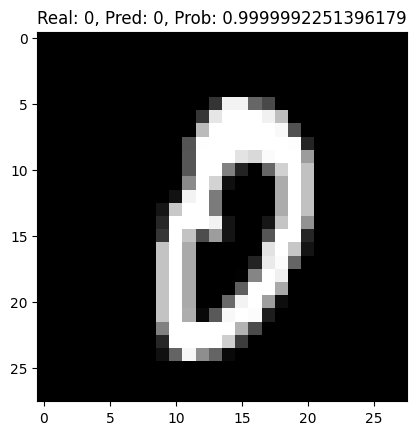

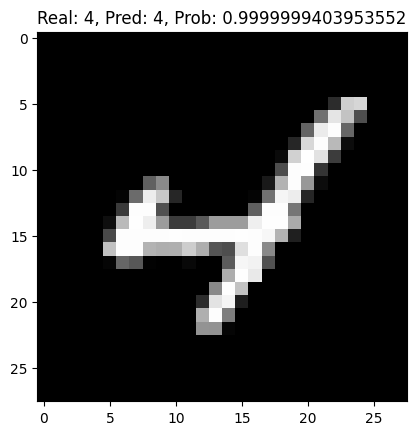

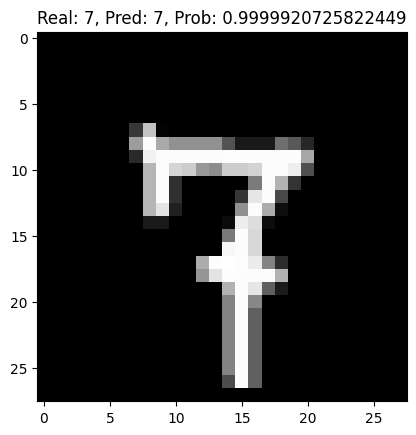

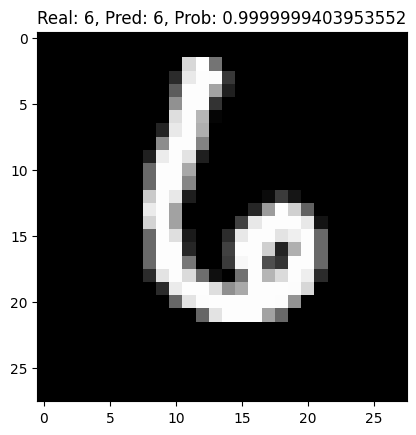

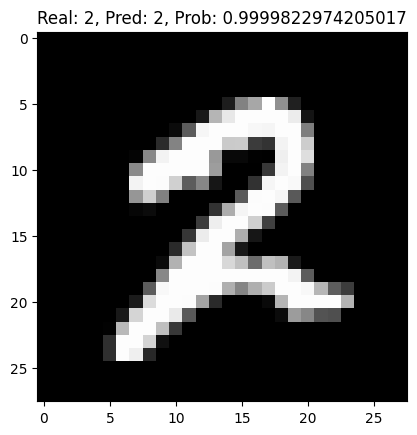

In [ ]:
# Evaluamos el modelo sobre el conjunto de test
Y_pred = model.predict(X_test)

# Mostramos algunos ejemplos al azar:
for i in range(5):
    idx = np.random.randint(0, X_test.shape[0])
    x_test = X_test[idx]
    y_test_label = y_test[idx]
    y_pred = Y_pred[idx]

    # x_test es la imagen en escala de grises.
    # y_test_label es la clase real.
    # y_pred es un vector de probabilidades, mostramos la clase más probable

    ##### COMPLETAR #####
    # Obtener la clase predicha a partir de y_pred
    # Mostrar un plot con la imagen x_test.
    # Mostrar el título con la clase real y la clase predicha.
    # Mostrar la probabilidad de la clase predicha.
    ######################

    y_pred_label = np.argmax(y_pred)
    plt.imshow(x_test, cmap='gray')
    plt.title(f"Real: {y_test_label}, Pred: {y_pred_label}, Prob: {y_pred[y_pred_label]}")
    plt.show()